In [335]:
import numpy as np
import sklearn as sk


In [336]:
def total_error(y_data,y_model):
    """Return the total error between data and model as a single real value."""
    return np.sum((y_data-y_model))

def abs_error(y_data,y_model):
    """Return the absolute error between data and model as a single real value."""
    return np.sum(np.abs(y_data-y_model))

def RMS_error(y_data,y_model):
    """Return the RMS error between data and model as a single real value."""
    return np.sqrt(np.mean((y_data-y_model)**2))

def relative_error(y_data,y_model):
    """Return the relative error between data and model as a single real value."""
    return np.sum(np.abs(y_data-y_model)/y_data)


In [337]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 120
# /content/drive/MyDrive/CS302 ModSim/Lab1/growth_ibm.dat.csv

In [338]:
# # Colab
# df = pd.read_csv('/content/drive/MyDrive/CS302 ModSim/Lab1/growth_ibm.dat.csv',names = ["Revenue", "Employees","Year_Index"])
# df2 = pd.read_csv('/content/drive/MyDrive/CS302 ModSim/Lab1/prof_ibm.dat.csv',names = ["Year_Index","Net_profit"])

# Local
df = pd.read_csv('/Users/divya/Documents/Semester 6/Modelling and Simulation/Lab1/growth_ibm.dat.csv', names=["Revenue", "Employees", "Year_Index"])
df2 = pd.read_csv('/Users/divya/Documents/Semester 6/Modelling and Simulation/Lab1/prof_ibm.dat.csv', names=[ "Year_Index", "Net_profit"]) 
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/divya/Documents/Semester 6/Modelling and Simulation/Lab1/growth_ibm.dat.csv'

In [ ]:
df2.head(100)

,Year_Index,Net_profit
0,1,0
1,2,1
2,3,1
3,4,1
4,5,1
...,...,...
88,89,3580
89,90,7600
90,91,8400
91,92,7900


# Graph1 for Revenue vs Time  and H vs Time

In [ ]:
cum_grow = []
sum = 0
for i in df['Revenue'].values:
  sum= sum+i
  cum_grow.append(sum)


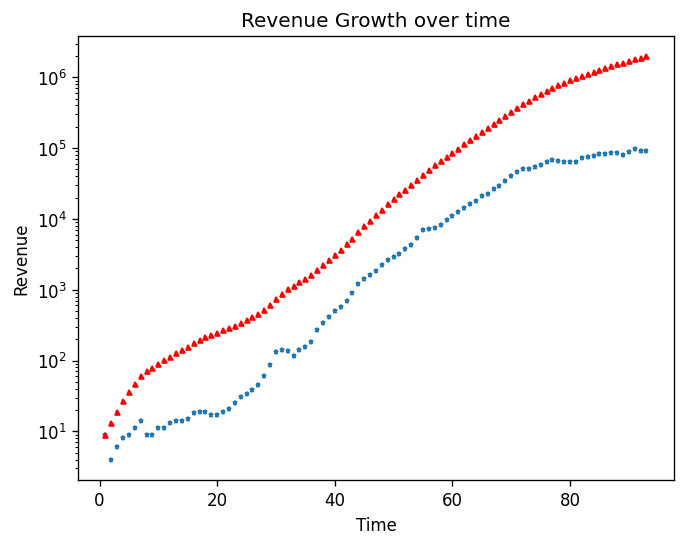

In [ ]:
plt.semilogy(df['Year_Index'].values,df['Revenue'].values,'*', markersize = 3)
plt.semilogy(df['Year_Index'].values,cum_grow,'^',color = 'r', markersize = 3)
plt.xlabel('Time')
plt.ylabel('Revenue')
plt.title('Revenue Growth over time')
plt.show()

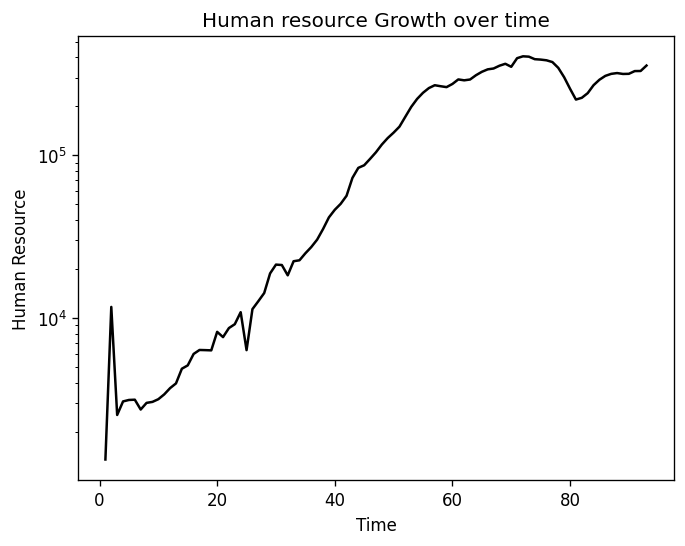

In [ ]:
plt.semilogy(df['Year_Index'].values,df['Employees'].values,'-',color = 'black')
plt.xlabel('Time')
plt.ylabel('Human Resource')
plt.title('Human resource Growth over time')
plt.show()

In [ ]:

ALPHA = 1; LAMDA = 0.145; N =1e-5;C=2.5
def est_revenue(t):
  return (N+ C**(-ALPHA)*np.exp(-ALPHA*LAMDA*t))**(-1/ALPHA)



Optimization

In [ ]:
from scipy.optimize import minimize


def revenue(t, ALPHA, LAMDA, N, C):
    return (N + C**(-ALPHA)*np.exp(-ALPHA*LAMDA*t))**(-1/ALPHA)


def cost_function(params, t, y_data):
    ALPHA, LAMDA, N, C = params
    y_pred = revenue(t, ALPHA, LAMDA, N, C)
    return np.mean((y_pred - y_data) ** 2)


initial_params = [1, 0.145, 1e-5, 2.5]

y_data = df['Revenue'].values

t = df['Year_Index'].values

result = minimize(cost_function, initial_params,
                  args=(t, y_data), method='BFGS')

ALPHA_opt, LAMDA_opt, N_opt, C_opt = result.x
print("Optimal parameters: ALPHA = {}, LAMDA = {}, N = {}, C = {}".format(ALPHA_opt, LAMDA_opt, N_opt, C_opt))

# Optimal parameters: ALPHA = 1.000001278153164, LAMDA = 0.14475761172582866, N = 1.0608003470968498e-05, C = 2.499998318877081

ALPHA = ALPHA_opt; LAMDA = LAMDA_opt; N = N_opt;C=C_opt


Optimal parameters: ALPHA = 1.000001278153164, LAMDA = 0.14475761172582866, N = 1.0608003470968498e-05, C = 2.499998318877081


In [ ]:
def est_cum_revenue(t):
  ALPHA_cum = 1; LAMDA_cum = 0.09; N_cum =1e-6;C_cum= 10;
  return (N_cum+ C_cum**(-ALPHA_cum)*np.exp(-ALPHA_cum*LAMDA_cum*t))**(-1/ALPHA_cum)


def cum_revenue(t, ALPHA, LAMDA, N, C):
    return (N + C**(-ALPHA)*np.exp(-ALPHA*LAMDA*t))**(-1/ALPHA)



In [ ]:

def cost_function_var(params, t, y_data):
    ALPHA, LAMDA, N, C = params
    y_pred = cum_revenue(t, ALPHA, LAMDA, N, C)
    return np.mean((y_pred - y_data) ** 2)

def cost_function_dev(params,t,y_data):
    ALPHA, LAMDA, N, C = params
    y_pred = cum_revenue(t, ALPHA, LAMDA, N, C)
    error = np.abs(y_pred - y_data)
    cost = np.mean(error)
    return cost

init = [1, 0.09, 1e-6, 10]

y_data = cum_grow   
t = df['Year_Index'].values

result = minimize(cost_function_dev, init, args=(t, y_data), method='Nelder-Mead')

ALPHA_opt_cum, LAMDA_opt_cum, N_opt_cum, C_opt_cum = result.x

print("Optimal parameters: ALPHA = {}, LAMDA = {}, N = {}, C = {}".format(ALPHA_opt_cum, LAMDA_opt_cum, N_opt_cum, C_opt_cum))

ALPHA_cum = ALPHA_opt_cum; LAMDA_cum = LAMDA_opt_cum; N_cum = N_opt_cum;C_cum=C_opt_cum

Optimal parameters: ALPHA = 0.9494984751195403, LAMDA = 0.14693213056912452, N = 9.068141167878416e-07, C = 13.013945648438852


In [ ]:
time = df['Year_Index'].values
y_fit = revenue(time, ALPHA_opt, LAMDA_opt, N_opt, C_opt)
y_fit_cum = cum_revenue(time, ALPHA_opt_cum, LAMDA_opt_cum, N_opt_cum, C_opt_cum)


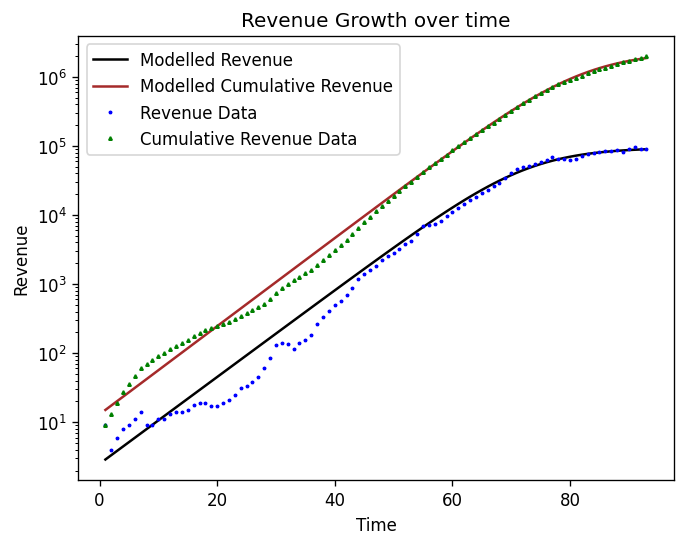

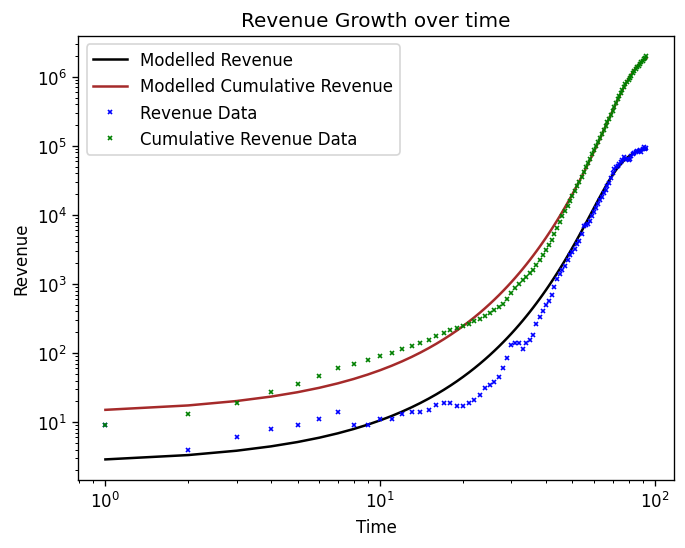

Total Error:  30.934195060036853
RMS Error:  2282.8280182577923
Mean Absolute Error:  1253.2301949027499
Relative Error : 33.10180919018642
Mean Relative Error : 0.3559334321525422
SD of Relative Error : 0.611011023418275
Total Error:  2020.2616616481907
RMS Error:  21213.431996976044
Mean Absolute Error:  8537.098090115724
Relative Error : 7.561508882723964
Mean Relative Error : 0.08130654712606412
SD of Relative Error : 0.25862453892840864


In [ ]:
plt.semilogy(time,y_fit,color='black')
plt.semilogy(time,y_fit_cum,color='brown')
plt.semilogy(df['Year_Index'].values,df['Revenue'].values,'*',color='blue',markersize=2)
plt.semilogy(df['Year_Index'].values,cum_grow,'^',color='green',markersize=2)
plt.xlabel('Time')
plt.ylabel('Revenue')
plt.title('Revenue Growth over time')
# give a legend
plt.legend(['Modelled Revenue', 'Modelled Cumulative Revenue',
           'Revenue Data', 'Cumulative Revenue Data'])

plt.show()


# graph like sir : log-log plot
plt.loglog(time,y_fit,color='black')
plt.loglog(time,y_fit_cum,color='brown')
plt.loglog(df['Year_Index'].values,df['Revenue'].values,'x',color='blue',markersize=2)
plt.loglog(df['Year_Index'].values,cum_grow,'x',color='g',markersize=2)
plt.xlabel('Time')
plt.ylabel('Revenue')
plt.title('Revenue Growth over time')
plt.legend(['Modelled Revenue', 'Modelled Cumulative Revenue', 'Revenue Data', 'Cumulative Revenue Data'])
plt.show()

# print different types of erros for revenue data
print('Total Error: ', np.mean((y_fit - df['Revenue'].values)))
print('RMS Error: ', np.sqrt(np.mean((y_fit - df['Revenue'].values)**2)))
print('Mean Absolute Error: ', np.mean(np.abs(y_fit - df['Revenue'].values)))
print('Relative Error :', np.sum((y_fit - df['Revenue'].values)/df['Revenue'].values))
print('Mean Relative Error :', np.mean((y_fit - df['Revenue'].values)/df['Revenue'].values))
print('SD of Relative Error :', np.std((y_fit - df['Revenue'].values)/df['Revenue'].values))

# Print different types of errors for the model 
print('Total Error: ', np.mean((y_fit_cum - cum_grow)))
print('RMS Error: ', np.sqrt(np.mean((y_fit_cum - cum_grow)**2)))
print('Mean Absolute Error: ', np.mean(np.abs(y_fit_cum - cum_grow)))
print('Relative Error :', np.sum(((y_fit_cum - cum_grow)/cum_grow)))
print('Mean Relative Error :', np.mean((y_fit_cum - cum_grow)/cum_grow))
print('SD of Relative Error :', np.std((y_fit_cum - cum_grow)/cum_grow))

    

In [ ]:
def est_humres(t):
  alp = 1; lam = 0.09; n =2e-6;c=1800;
  return (n+ c**(-alp)*np.exp(-alp*lam*t))**(-1/alp)

def humres(t, alp, lam, n, c):
    return (n + c**(-alp)*np.exp(-alp*lam*t))**(-1/alp)

ALPHA_hum = 1; LAMDA_hum = 0.09; N = 2e-6; C = 1800;


In [ ]:
def cost_function_hum(params, t, y_data):
    alp, lam, n, c = params
    y_pred = humres(t, alp, lam, n, c)
    return np.mean((y_pred - y_data) ** 4)

def cost_function_hum_dev(params,t,y_data):
    alp, lam, n, c = params
    y_pred = humres(t, alp, lam, n, c)
    error = np.abs(y_pred - y_data)
    cost = np.mean(error)
    return cost

def cost_function_relative(params,t,y_data):
    alp, lam, n, c = params
    y_pred = humres(t, alp, lam, n, c)
    # calculate the relative error between y_pred and y_data
    error = np.abs(y_pred - y_data) / y_data
    # cost is the mean of the error
    cost = np.mean(error)
    return cost

init = [1, 0.09, 2e-6, 1800]

y_data = df['Employees'].values
t = df['Year_Index'].values
result = minimize(cost_function_relative, init, args=(t, y_data), method='Nelder-Mead')

ALPHA_opt_hum, LAMDA_opt_hum, N_opt_hum, C_opt_hum = result.x

print("Optimal parameters: ALPHA = {}, LAMDA = {}, N = {}, C = {}".format(ALPHA_opt_hum, LAMDA_opt_hum, N_opt_hum, C_opt_hum))

ALPHA_hum = ALPHA_opt_hum; LAMDA_hum = LAMDA_opt_hum; N_hum = N_opt_hum;C_hum=C_opt_hum

Optimal parameters: ALPHA = 1.0841114567661503, LAMDA = 0.10191052278192884, N = 9.408046138402123e-07, C = 1043.6687554233736


In [ ]:
time = df['Year_Index'].values
y_fit3 = humres(time, ALPHA_opt_hum, LAMDA_opt_hum, N_opt_hum, C_opt_hum)


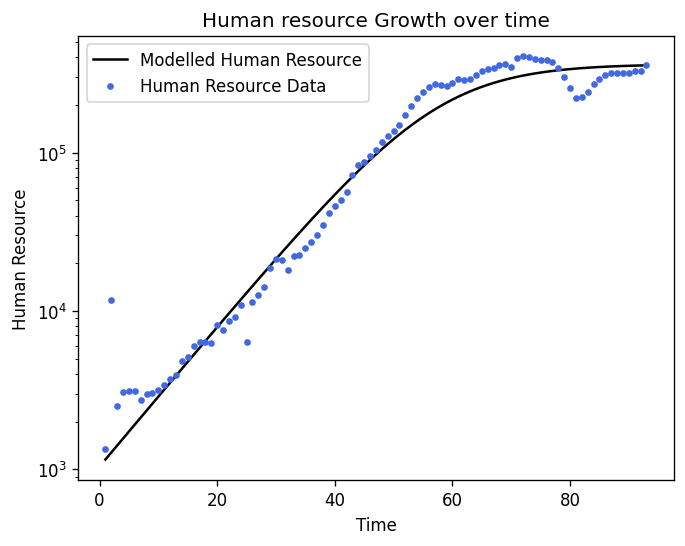

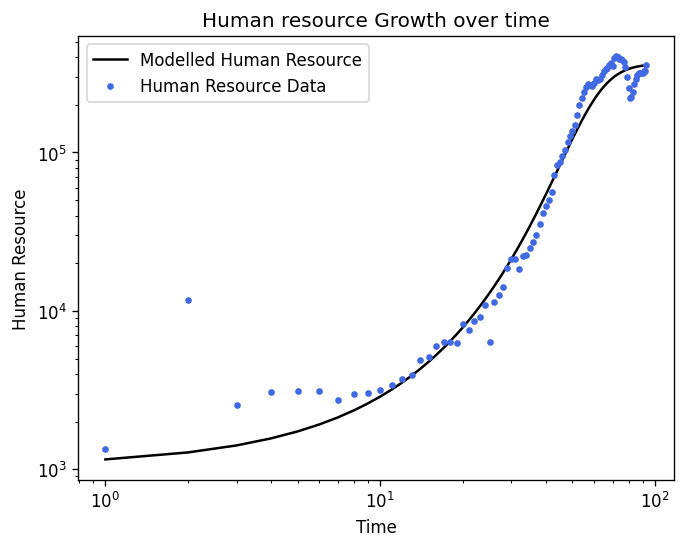

Total Error:  -9817.902811732665
RMS Error:  44683.36041762834
Mean Absolute Error:  29916.29404396256
Relative Error : -1.5105343127527326
mean Relative Error : -0.016242304438201426
SD of Relative Error : 0.2654697720614238


In [ ]:
plt.semilogy(time,y_fit3,color='black')
plt.semilogy(df['Year_Index'].values,df['Employees'].values,'.',color = 'royalblue')
plt.xlabel('Time')
plt.ylabel('Human Resource')
plt.title('Human resource Growth over time')
plt.legend(['Modelled Human Resource', 'Human Resource Data'])
plt.show()


# loglog plot
plt.loglog(time,y_fit3,color='black')
plt.loglog(df['Year_Index'].values,
           df['Employees'].values, '.', color='royalblue')
plt.xlabel('Time')
plt.ylabel('Human Resource')
plt.title('Human resource Growth over time')
plt.legend(['Modelled Human Resource', 'Human Resource Data'])
plt.show()


# print different types of erros for revenue data
print('Total Error: ', np.mean((y_fit3 - df['Employees'].values)))
print('RMS Error: ', np.sqrt(np.mean((y_fit3 - df['Employees'].values)**2)))
print('Mean Absolute Error: ', np.mean(np.abs(y_fit3 - df['Employees'].values)))
print('Relative Error :', np.sum((y_fit3 - df['Employees'].values)/df['Employees'].values))
print('mean Relative Error :', np.mean((y_fit3 - df['Employees'].values)/df['Employees'].values))
print('SD of Relative Error :', np.std((y_fit3 - df['Employees'].values)/df['Employees'].values))



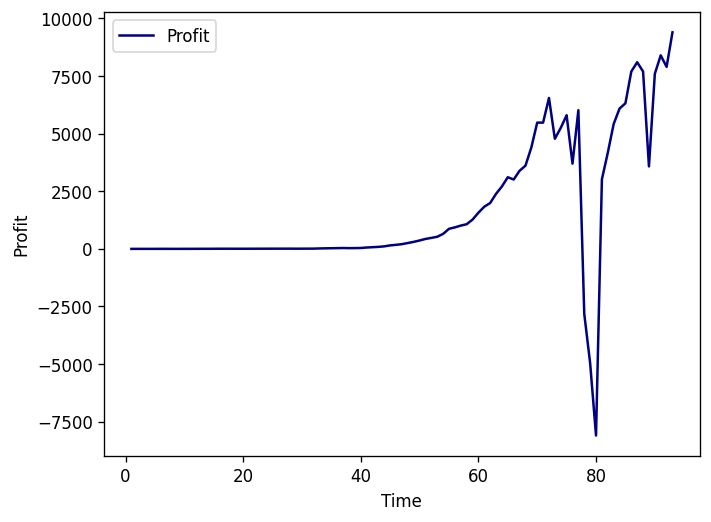

In [ ]:
profit = df2['Net_profit'].values
time = df2['Year_Index'].values

plt.plot(time,profit,color = 'navy')
plt.xlabel('Time')
plt.ylabel('Profit')
plt.legend(['Profit'])
plt.show()


In [ ]:
def get_u_v(time, R, H):
    ALPHA_h = 1; ALPHA_r = 1; LAMDA_h = 0.09; LAMDA_r = 0.09; N_h = 2e-6; N_r = 1e-5; C_h = 1800; C_r = 1800;
    u = H**(-ALPHA_h) - N_h
    v = R**(-ALPHA_r) - N_r
    return u, v



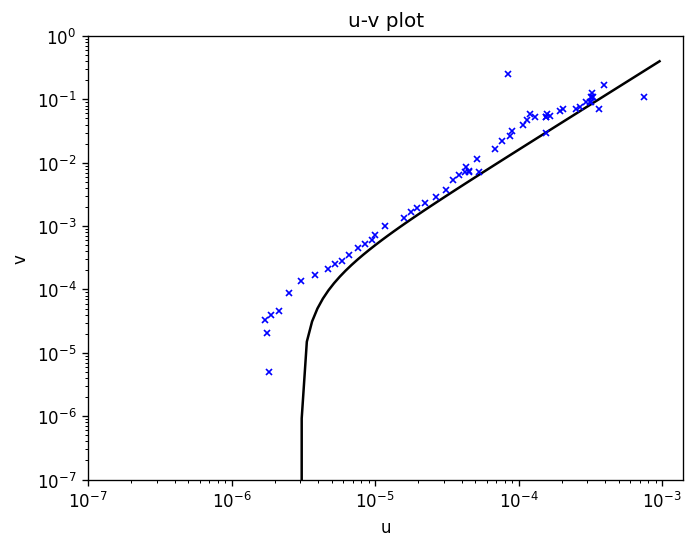

In [ ]:

# extend time from -10 to 100 in step of 1
time = np.arange(0, 100, 1)
y_fit = revenue(time, ALPHA_opt, LAMDA_opt, N_opt, C_opt)
y_fit3 = humres(time, ALPHA_opt_hum, LAMDA_opt_hum, N_opt_hum, C_opt_hum)

u_est, v_est = get_u_v(time, y_fit, y_fit3)
u_data, v_data = get_u_v(time, df['Revenue'].values, df['Employees'].values)

plt.loglog(u_est, v_est, color='black')
plt.loglog(u_data, v_data, 'x', color='blue', markersize=4)
plt.xlabel('u')
plt.ylabel('v')
plt.xticks([1e-7,1e-6,1e-5,1e-4,1e-3])
plt.yticks([1e-7,1e-6,1e-5,1e-4,1e-3, 1e-2,0.1,1])
plt.title('u-v plot')
plt.show()
